# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.328,0.770,0,0,0,NaN,NaN,NaN,0.0,10.0,0.070244,0.045907,0.045907,0.012766,0.127660,0.023211
1,crossfold,5,Popular,Y,0.322,0.935,0,0,0,NaN,NaN,NaN,0.0,10.0,0.097678,0.061626,0.061626,0.013830,0.138298,0.025145
2,crossfold,4,PersMean,Y,0.657,0.894,188,188,188,1.0,0.811297,0.987295,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,crossfold,5,PersMean,Y,0.702,0.974,188,188,188,1.0,0.760287,0.956432,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,crossfold,3,Popular,Y,0.081,0.636,0,0,0,NaN,NaN,NaN,0.0,10.0,0.072412,0.050386,0.050386,0.011111,0.111111,0.020202


In [4]:
results

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.328,0.770,0,0,0,NaN,NaN,NaN,0.0,10.0,0.070244,0.045907,0.045907,0.012766,0.127660,0.023211
1,crossfold,5,Popular,Y,0.322,0.935,0,0,0,NaN,NaN,NaN,0.0,10.0,0.097678,0.061626,0.061626,0.013830,0.138298,0.025145
2,crossfold,4,PersMean,Y,0.657,0.894,188,188,188,1.000000,0.811297,0.987295,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,crossfold,5,PersMean,Y,0.702,0.974,188,188,188,1.000000,0.760287,0.956432,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,crossfold,3,Popular,Y,0.081,0.636,0,0,0,NaN,NaN,NaN,0.0,10.0,0.072412,0.050386,0.050386,0.011111,0.111111,0.020202
5,crossfold,3,PersMean,Y,0.246,0.757,189,189,189,1.000000,0.807884,1.033286,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,crossfold,2,PersMean,Y,0.163,0.358,189,189,189,1.000000,0.755695,0.952167,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,crossfold,4,ItemItem,Y,4.413,4.080,188,188,188,1.000000,0.731479,0.919828,1.0,10.0,0.006775,0.003103,0.003103,0.001596,0.015957,0.002901
8,crossfold,5,ItemItem,Y,4.204,6.390,188,188,187,0.994681,0.715014,0.874849,1.0,10.0,0.009082,0.003493,0.003493,0.002660,0.026596,0.004836
9,crossfold,3,ItemItem,Y,4.071,3.367,189,189,189,1.000000,0.742210,0.982914,1.0,10.0,0.009257,0.003645,0.003645,0.002646,0.026455,0.004810


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
Algorithm,,,,,,,,,,,,,,,,
ItemItem,4.5112,4.4248,188.6,188.6,188.2,0.997878,0.731357,0.931329,1.0,10.0,0.007508,0.003122,0.003122,0.002015,0.020151,0.003664
PersMean,0.3698,0.6412,188.6,188.6,188.6,1.000000,0.781028,0.983202,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Popular,0.1706,0.5464,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10.0,0.076471,0.046935,0.046935,0.012409,0.124091,0.022562
SLIM,1954.6564,0.8778,188.6,188.6,188.6,1.000000,0.798846,0.999802,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

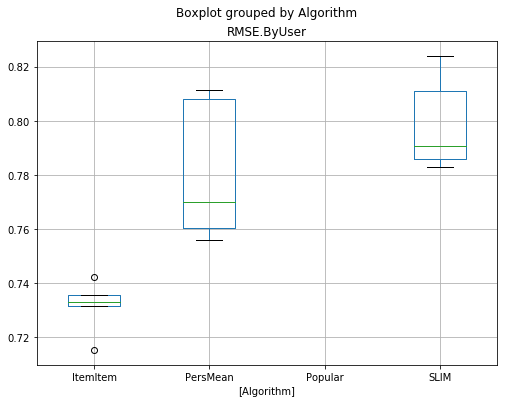

In [6]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm', figsize=(8,6))

Next up: nDCG

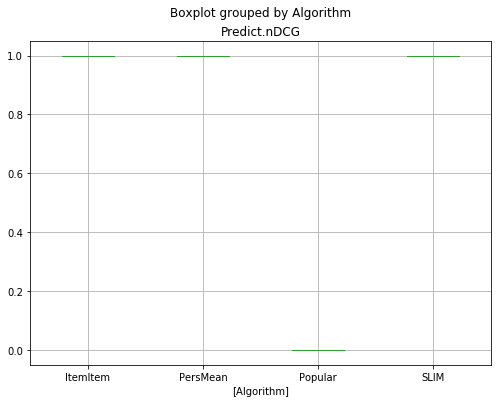

In [7]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01b4078fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f01b3fe8da0>], dtype=object)

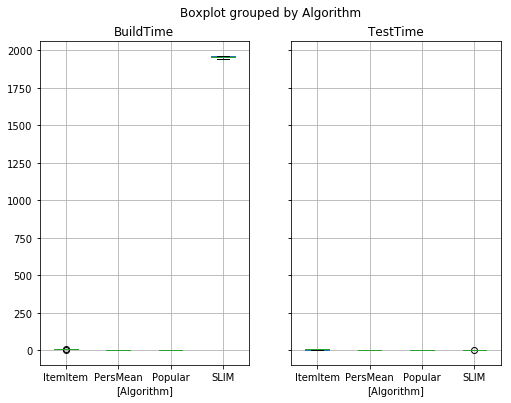

In [8]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

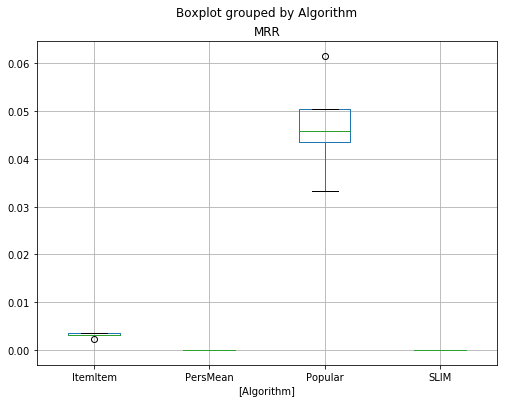

In [9]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

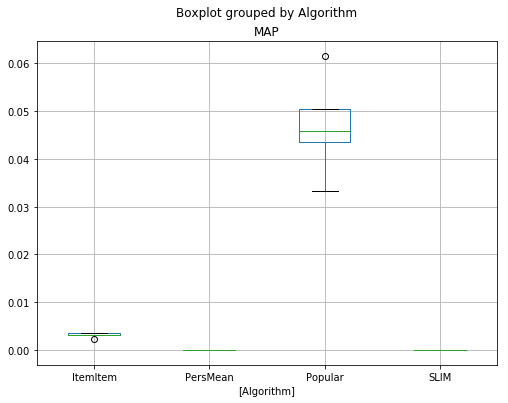

In [10]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

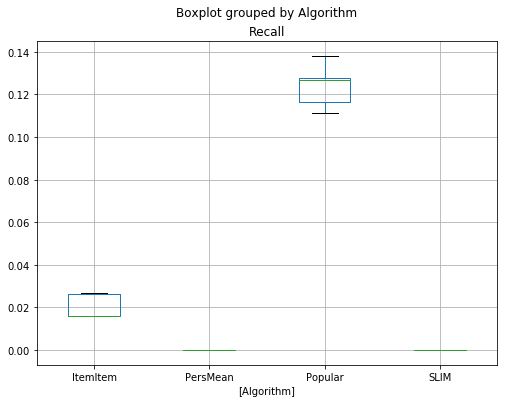

In [11]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

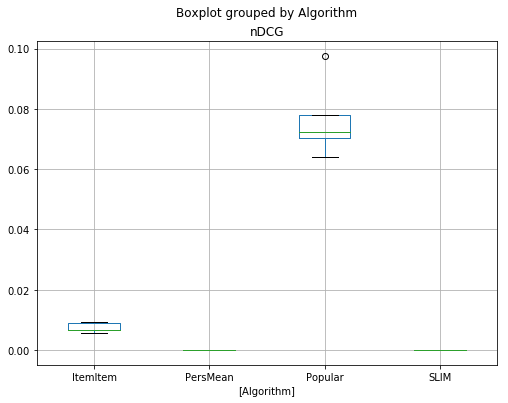

In [12]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))